Ejemplo ePy_docs + ePy_units

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from ePy_units.converter import UnitConverter
converter = UnitConverter("structural")

from ePy_docs.writers import DocumentWriter
writer = DocumentWriter("report", "handwritten")

In [16]:
writer.add_h1("Conversor de tablas en formato dataframe")

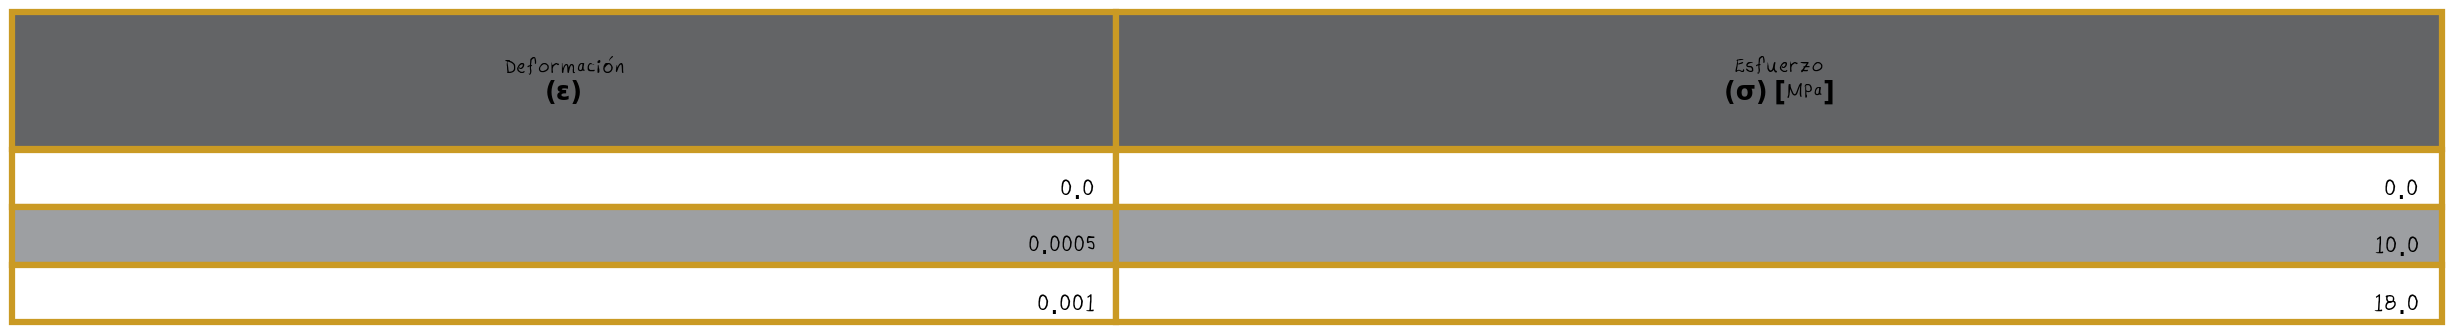

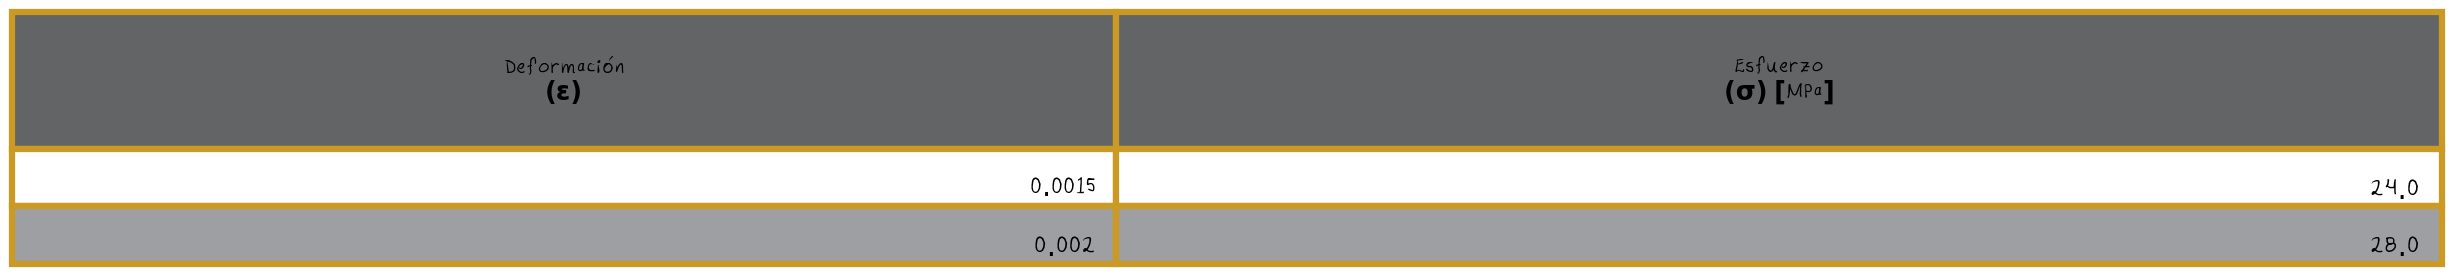

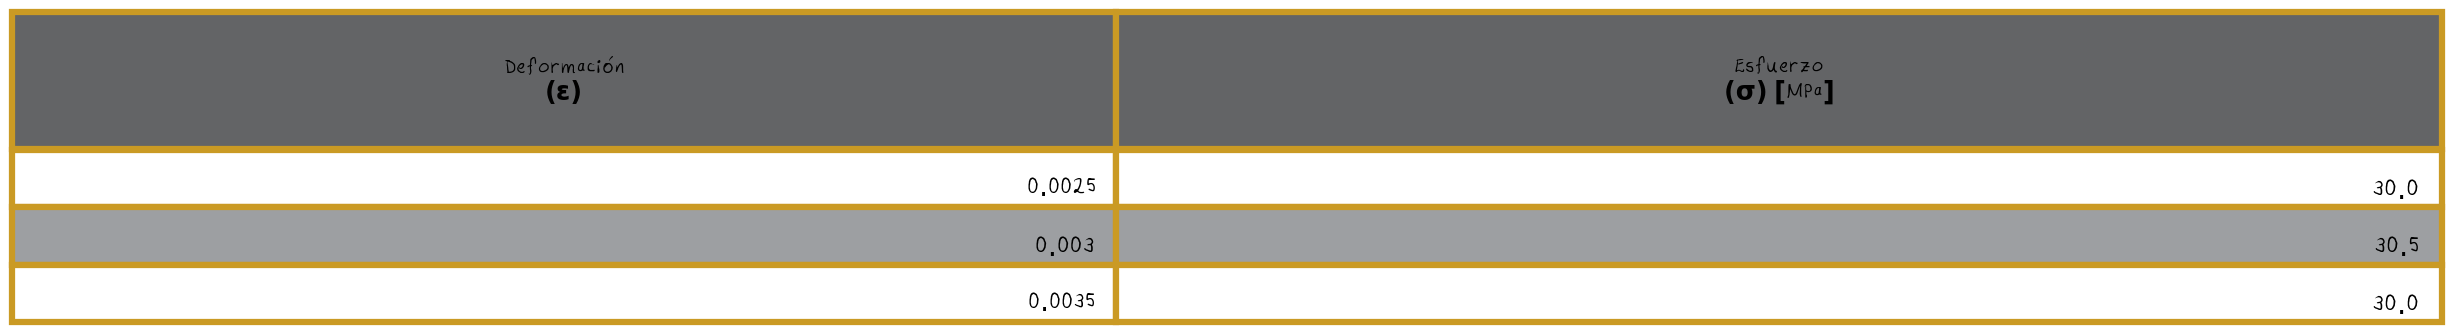

In [17]:
# Crear datos de diagrama esfuerzo-deformación
# Datos típicos de concreto en compresión
strain = np.array([0, 0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.003, 0.0035])
stress = np.array([0, 10, 18, 24, 28, 30, 30.5, 30])  # MPa

df_stress_strain = pd.DataFrame({
    'Deformación (ε)': strain,
    'Esfuerzo (σ) [MPa]': stress
})

writer.add_table(df_stress_strain,title="Tabla original" , show_figure=True, max_rows_per_table = [3, 2, 25, 10])

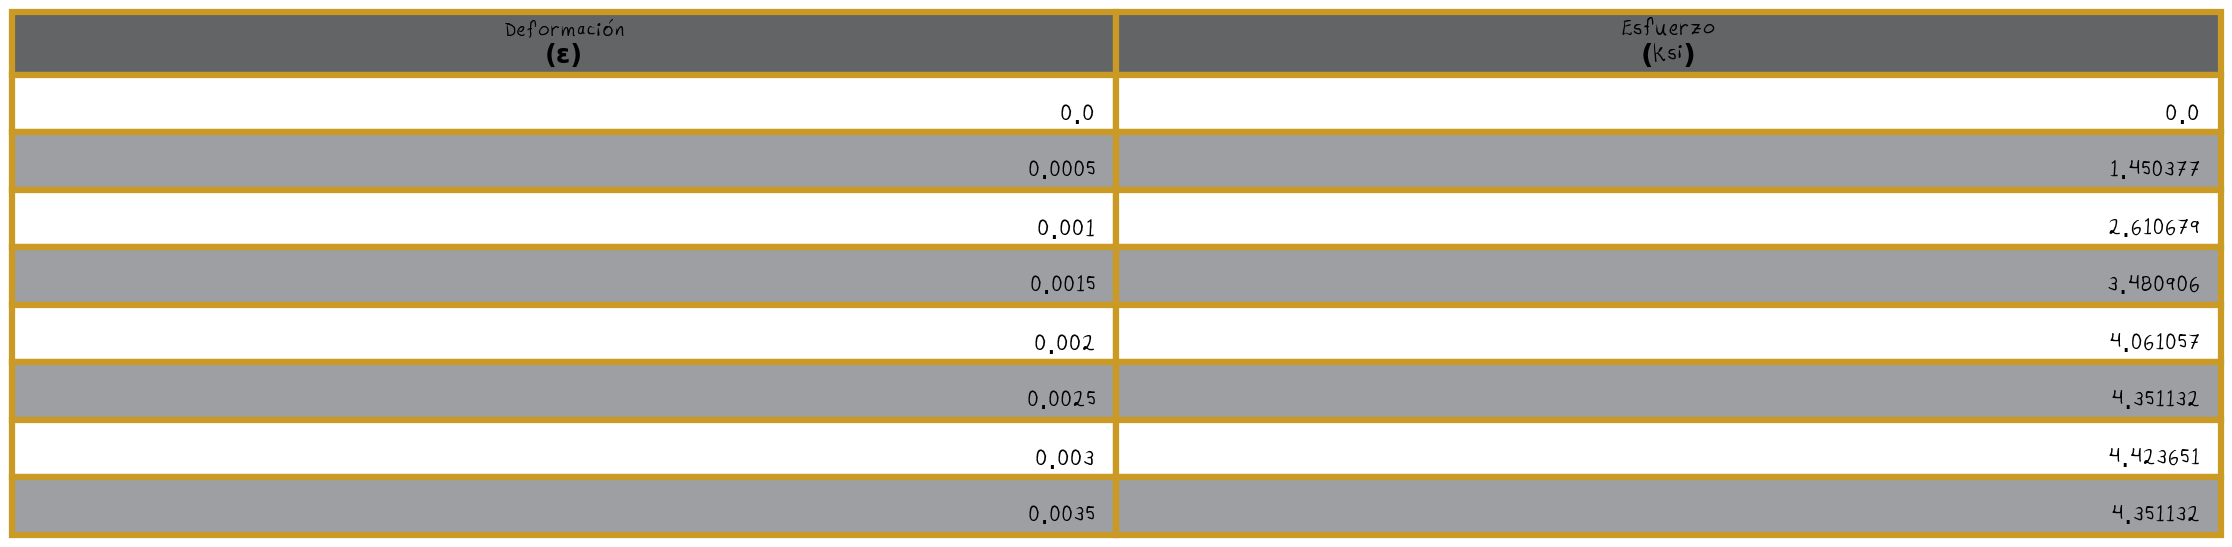

In [5]:
converted_df_stress_strain = converter.convert_table(df_stress_strain, target_system = "Imperial")
writer.add_colored_table(converted_df_stress_strain,title="Tabla convertida a Imperial" , show_figure=True)

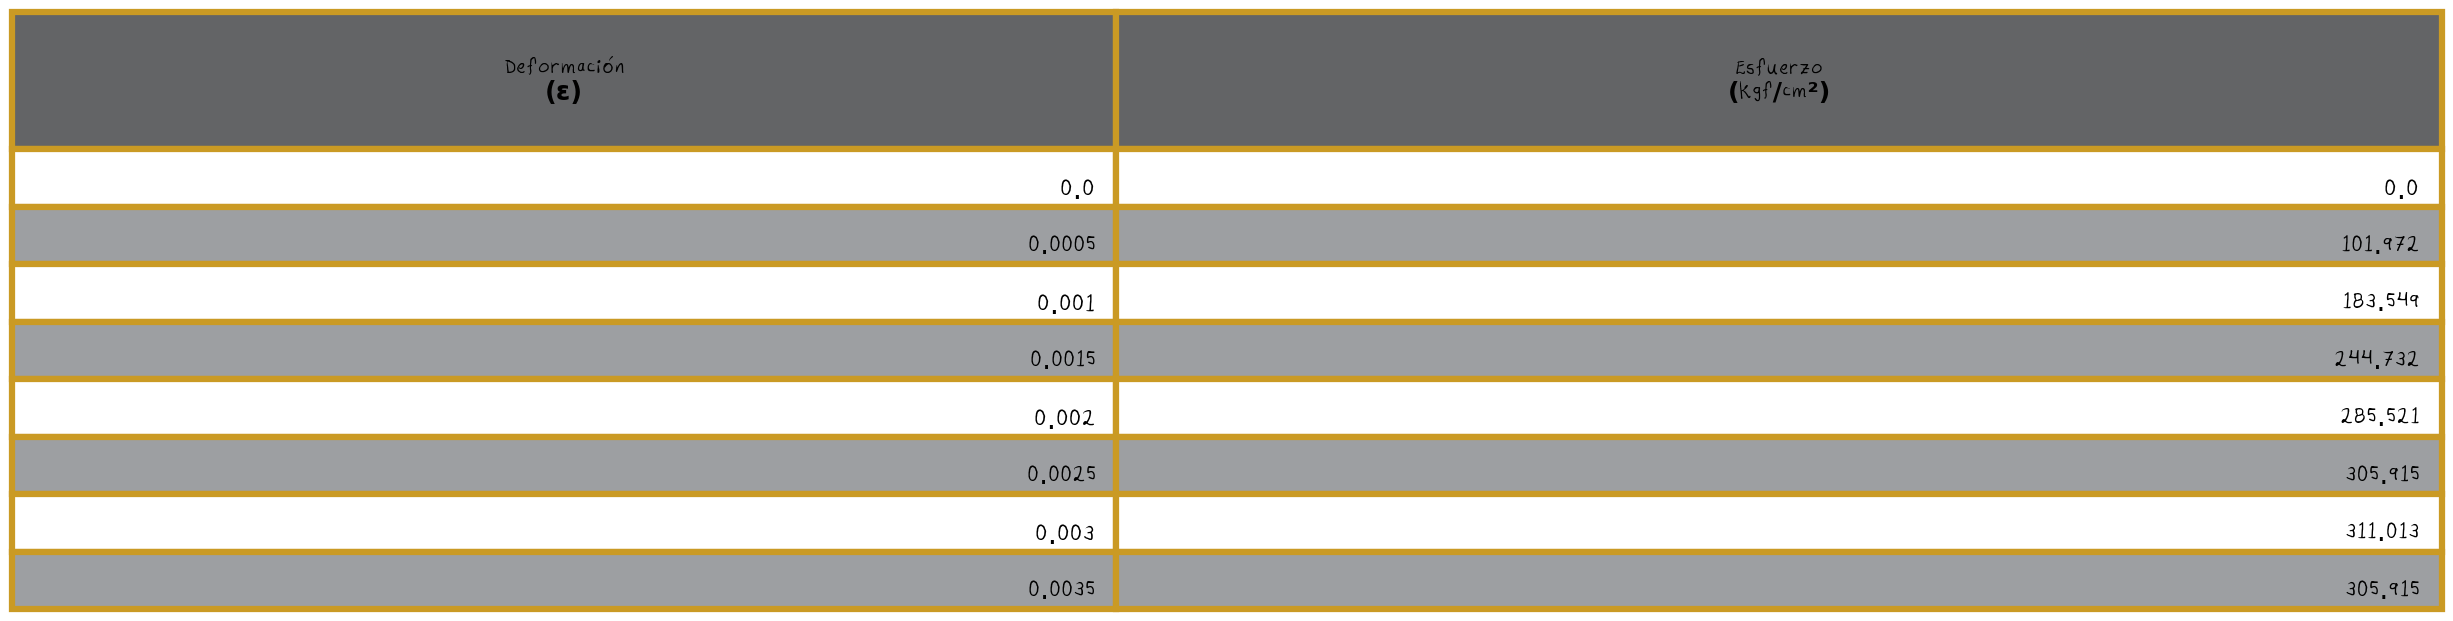

In [6]:
converted_df_stress_strain = converter.convert_table(df_stress_strain, target_system = "MKS")
writer.add_colored_table(converted_df_stress_strain,title="Tabla convertida a MKS" , show_figure=True)

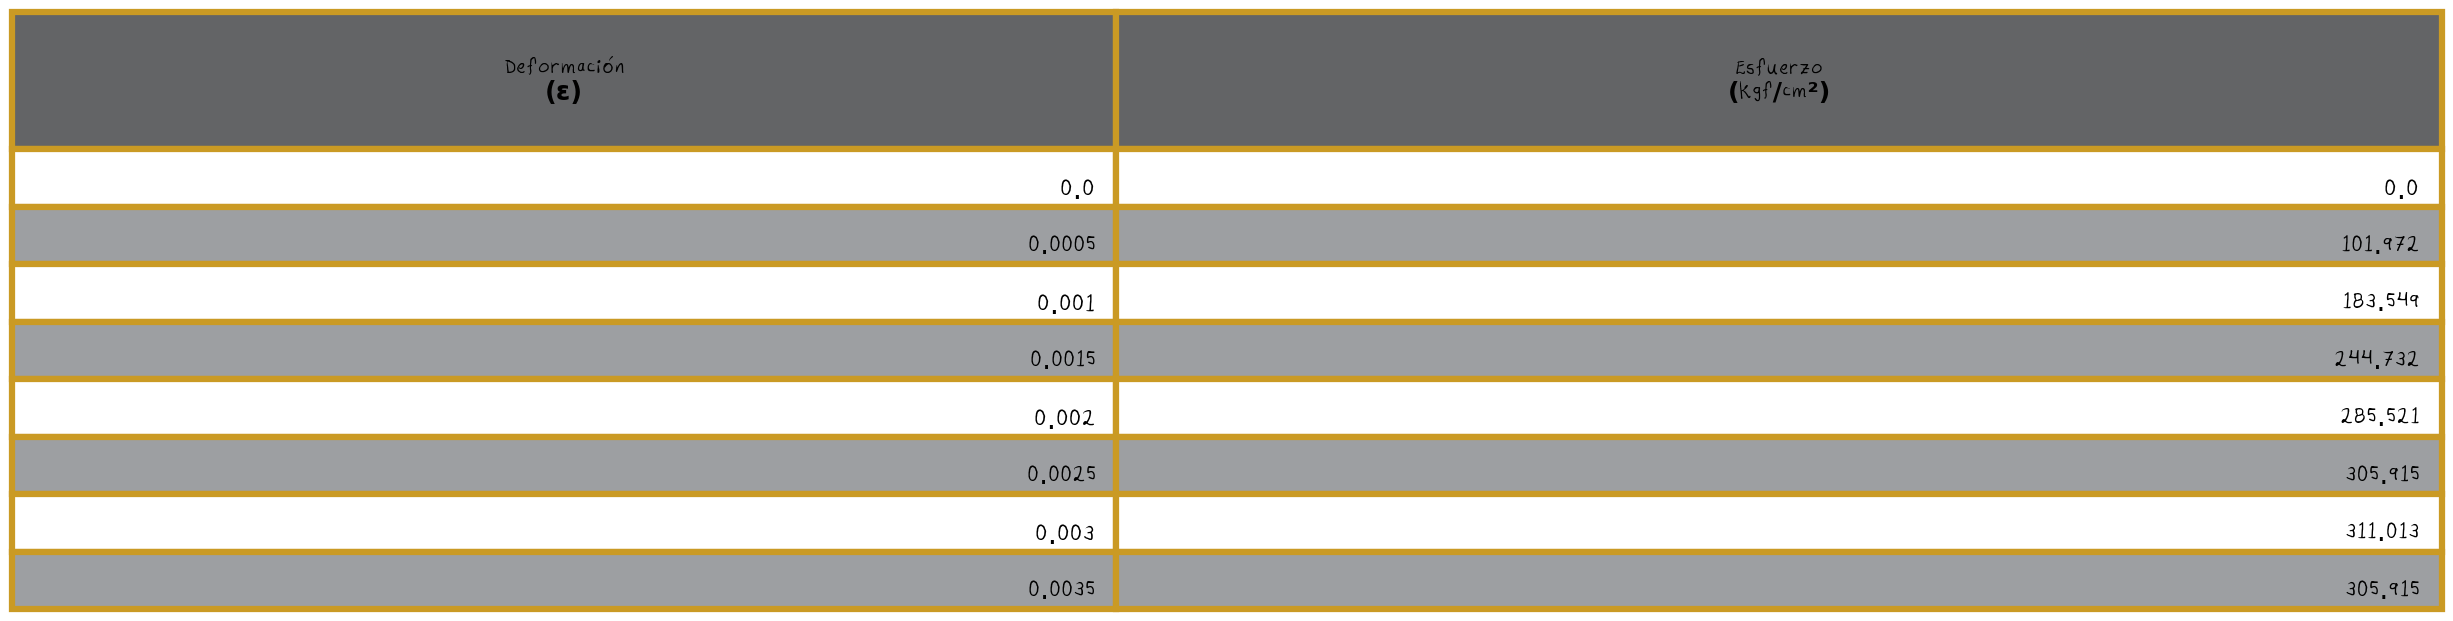

In [7]:
writer.add_colored_table(converted_df_stress_strain,title="Tabla convertida a MKS" , show_figure=True, highlight_columns="Esfuerzo")

In [8]:
writer.add_h1("Conversor directa de gráficos matplotlib")

C:\Users\ingah\AppData\Local\Temp\ipykernel_15660\2994622817.py:9: UserWarning: Glyph 46 (.) missing from font(s) C2024_anm_font.
  plt.tight_layout()
C:\Users\ingah\AppData\Local\Temp\ipykernel_15660\2994622817.py:9: UserWarning: Glyph 40 (() missing from font(s) C2024_anm_font.
  plt.tight_layout()
C:\Users\ingah\AppData\Local\Temp\ipykernel_15660\2994622817.py:9: UserWarning: Glyph 949 (\N{GREEK SMALL LETTER EPSILON}) missing from font(s) C2024_anm_font.
  plt.tight_layout()
C:\Users\ingah\AppData\Local\Temp\ipykernel_15660\2994622817.py:9: UserWarning: Glyph 41 ()) missing from font(s) C2024_anm_font.
  plt.tight_layout()
C:\Users\ingah\AppData\Local\Temp\ipykernel_15660\2994622817.py:9: UserWarning: Glyph 963 (\N{GREEK SMALL LETTER SIGMA}) missing from font(s) C2024_anm_font.
  plt.tight_layout()
C:\Users\ingah\AppData\Local\Temp\ipykernel_15660\2994622817.py:9: UserWarning: Glyph 91 ([) missing from font(s) C2024_anm_font.
  plt.tight_layout()
C:\Users\ingah\AppData\Local\Temp\ip

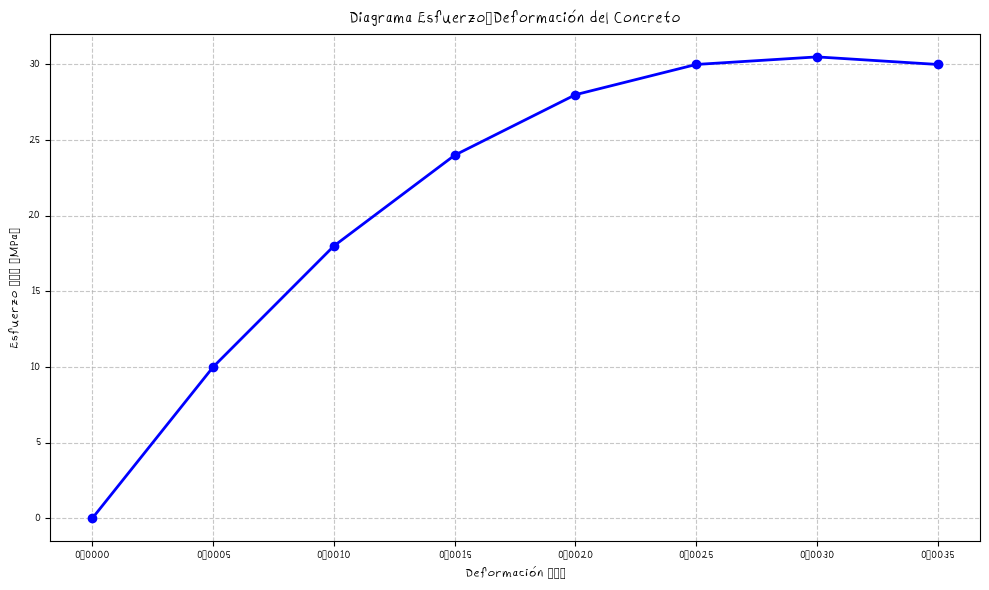

In [24]:
# Crear gráfico esfuerzo-deformación
fig = plt.figure(figsize=(10, 6))
plt.plot(df_stress_strain['Deformación (ε)'], df_stress_strain['Esfuerzo (σ) [MPa]'], 
         marker='o', linewidth=2, markersize=6, color='blue')
plt.xlabel('Deformación (ε)', fontsize=12)
plt.ylabel('Esfuerzo (σ) [MPa]', fontsize=12)
plt.title('Diagrama Esfuerzo-Deformación del Concreto', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

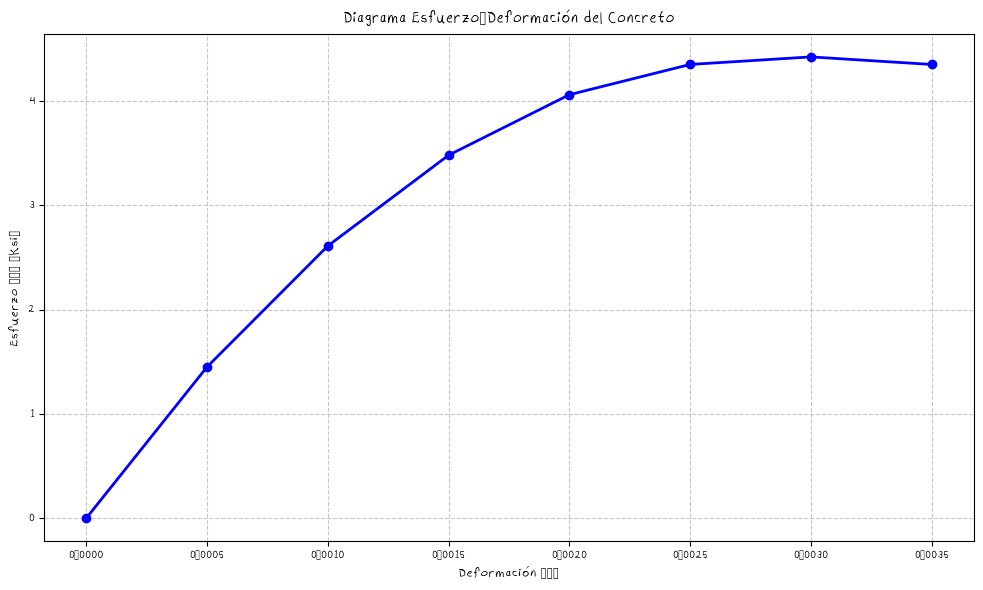

In [27]:
fig_converted_imperial = converter.convert_plot(fig, target_system = "Imperial", show_figure=False)
writer.add_plot(fig_converted_imperial)

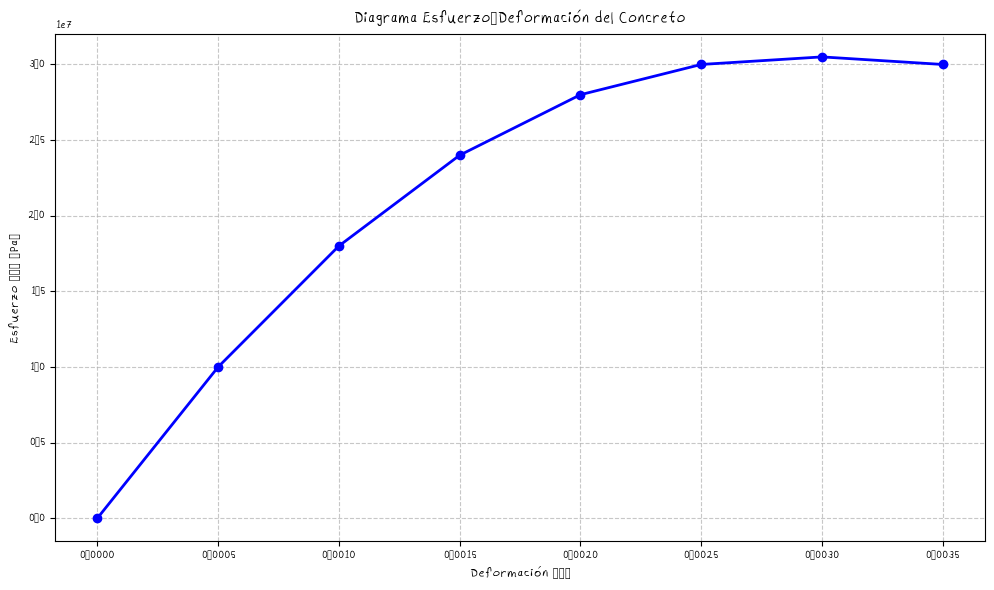

In [11]:
fig_converted_si = converter.convert_plot(fig, target_system = "SI", show_figure=False)
writer.add_plot(fig_converted_si)

In [22]:
writer.generate(html=True, pdf=True)

{'qmd': WindowsPath('c:/Users/ingah/estructuraPy/ePy_docs/results/report/Document.qmd'),
 'pdf': WindowsPath('c:/Users/ingah/estructuraPy/ePy_docs/results/report/Document.pdf'),
 'html': WindowsPath('c:/Users/ingah/estructuraPy/ePy_docs/results/report/Document.html')}